# Music Classification

#### Importing the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import csv
import os

C:\Users\prith\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\prith\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\prith\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\prith\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


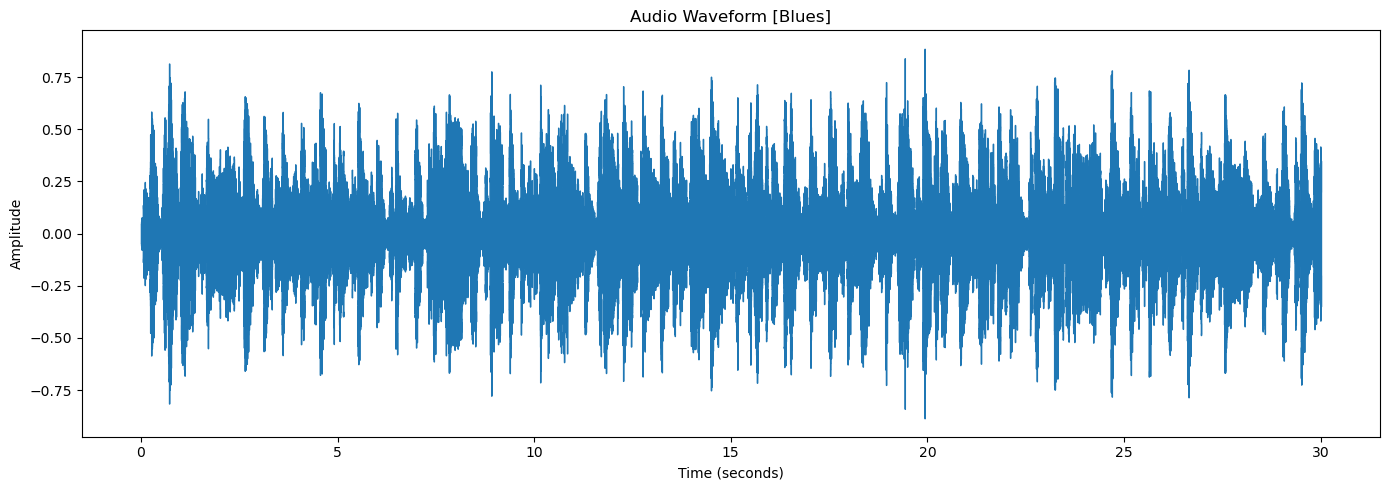

In [2]:
filename = 'Data/genres_original/blues/blues.00000.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename) #To show which audio file we are playing
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform [Blues]')
plt.tight_layout()
plt.show()

In above we are plotting the audio waveform with librosa library, we will try plotting the same in scipy library as well

In [3]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio = wav.read(filename)
print("The sample rate is ",sample_rate)
print("The sample rate using the scipy library is ",wave_sample_rate)
print("The librosa data is ",data)
print("The scipy data is ",wave_audio)

The sample rate is  22050
The sample rate using the scipy library is  22050
The librosa data is  [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]
The scipy data is  [  240   544   250 ... -1822 -2001 -2103]


We will be checking how the labels in our dataset are distributed, To check that we will see how many labels are there

In [4]:
#To check if the dataset is balanced or not
import pandas as pd
metadata = pd.read_csv('Data/features_30_sec.csv')
metadata.head(10)
metadata['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          99
Name: label, dtype: int64

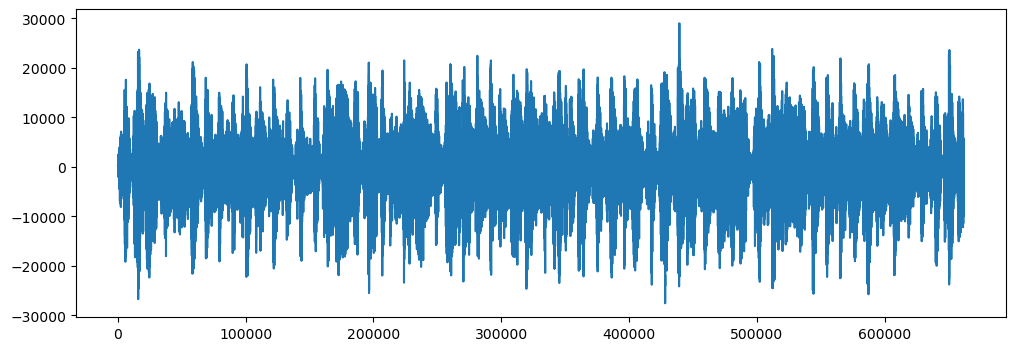

In [5]:
plt.figure(figsize = (12,4))
plt.plot(wave_audio)

In librosa we will have a normalized output for both left and right audio outputs whereas in scipy we will have a seperate channel for left and right output

We will now access the dataset to extract the induvidual mfcc features for all the audio clips and store them in a dataframe

#### Doing the same for multiple folders

In [6]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate tempo flux contrast flatness'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir('data/genres_original/'+g):
        songname = 'data/genres_original/'+ g + '/' + filename
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        #rmse = librosa.feature.mfcc(y=y)

        #tempo = librosa.beat.tempo(y, sr=sr)[0]

        #flux = librosa.onset.onset_strength(y=y, sr=sr)
        #contrast = librosa.feature.spectral_contrast(y, sr=sr)
        #flatness = librosa.feature.spectral_flatness(y)

        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

Blues


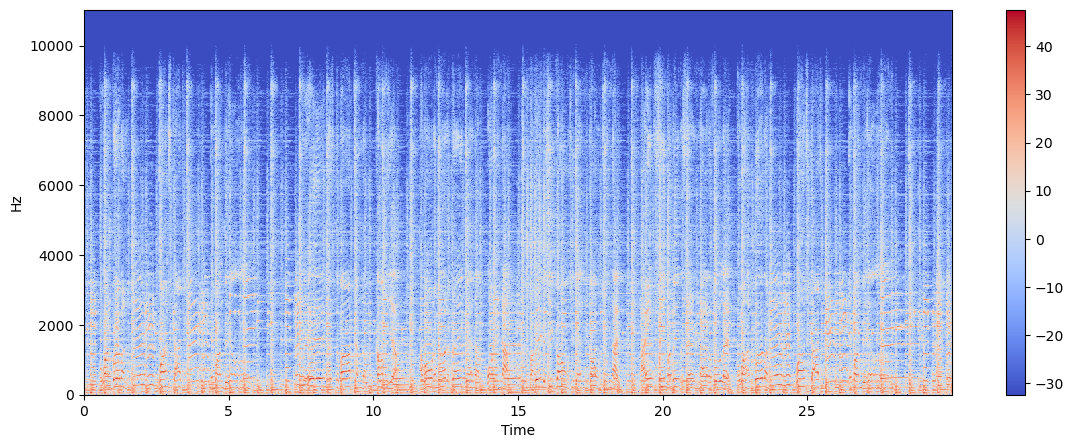

In [7]:
  #spectrogram for Blues genre
  songname = 'Data/genres_original/blues/blues.00000.wav'
  y, sr = librosa.load(songname, mono=True, duration=30)
  X = librosa.stft(y)
  Xdb = librosa.amplitude_to_db(abs(X))
  plt.figure(figsize=(14, 5))
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()
  print("Blues")

#### Loading the saved dataset

In [8]:
df = pd.read_csv("data.csv")
df

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,tempo,flux,contrast,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349951,1784.416546,2002.657106,3806.418650,0.083066,-113.619385,121.553017,-19.151056,42.345768,...,-1.688358,-0.409329,-2.298869,1.219947,blues,NaN,NaN,NaN,NaN,NaN
1,blues.00001.wav,0.340945,1529.871314,2038.612143,3548.986873,0.056044,-207.581512,123.997147,8.939115,35.870758,...,-0.717028,0.292333,-0.285717,0.532144,blues,NaN,NaN,NaN,NaN,NaN
2,blues.00002.wav,0.363562,1552.637786,1747.382028,3041.089944,0.076301,-90.776344,140.448608,-29.100559,31.687340,...,-7.721793,-1.816497,-3.434354,-2.231391,blues,NaN,NaN,NaN,NaN,NaN
3,blues.00003.wav,0.404848,1070.110059,1596.244204,2185.061787,0.033309,-199.462006,150.094727,5.649167,26.870144,...,-3.320055,0.637263,-0.617507,-3.406940,blues,NaN,NaN,NaN,NaN,NaN
4,blues.00004.wav,0.308598,1835.507009,1748.367477,3581.003346,0.101500,-160.291855,126.195763,-35.602501,22.151169,...,-5.453736,-0.924468,-4.408076,-11.701833,blues,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,rock.00095.wav,0.351992,2008.537045,2106.349206,4254.124276,0.089267,-153.616501,109.894516,-23.106590,59.007462,...,-13.300427,2.473230,-6.719625,-1.199268,rock,NaN,NaN,NaN,NaN,NaN
995,rock.00096.wav,0.398761,2006.009248,2068.224879,4147.166589,0.097659,-142.442062,116.238441,-32.190319,49.114605,...,-10.854527,1.872500,-7.467166,-2.797982,rock,NaN,NaN,NaN,NaN,NaN
996,rock.00097.wav,0.431909,2077.166788,1926.895810,4030.750627,0.121824,-125.065109,115.203308,-48.004681,52.843102,...,-12.854931,3.451785,-12.594253,-2.104668,rock,NaN,NaN,NaN,NaN,NaN
997,rock.00098.wav,0.362428,1398.581575,1817.813570,3014.673437,0.048731,-224.994019,123.669685,-9.775933,56.605717,...,-4.421224,1.560510,-5.046413,-3.582565,rock,NaN,NaN,NaN,NaN,NaN


In [9]:
print("The shape of the dataframe is",df.shape)
print(df.head(5))
print(type(df))
df = df.dropna(axis = 1)

The shape of the dataframe is (999, 32)
          filename  chroma_stft         rmse  spectral_centroid  \
0  blues.00000.wav     0.349951  1784.416546        2002.657106   
1  blues.00001.wav     0.340945  1529.871314        2038.612143   
2  blues.00002.wav     0.363562  1552.637786        1747.382028   
3  blues.00003.wav     0.404848  1070.110059        1596.244204   
4  blues.00004.wav     0.308598  1835.507009        1748.367477   

   spectral_bandwidth   rolloff  zero_crossing_rate       tempo       flux  \
0         3806.418650  0.083066         -113.619385  121.553017 -19.151056   
1         3548.986873  0.056044         -207.581512  123.997147   8.939115   
2         3041.089944  0.076301          -90.776344  140.448608 -29.100559   
3         2185.061787  0.033309         -199.462006  150.094727   5.649167   
4         3581.003346  0.101500         -160.291855  126.195763 -35.602501   

    contrast  ...    mfcc12    mfcc13    mfcc14     mfcc15  mfcc16  mfcc17  \
0  42.3457

In [10]:
x_df = df.iloc[:,1:-1]
y_df = df.iloc[:,-1]
#y_df_knn = y_df_knn.to_frame()

In [11]:
x_df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,tempo,flux,contrast,flatness,...,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15
0,0.349951,1784.416546,2002.657106,3806.418650,0.083066,-113.619385,121.553017,-19.151056,42.345768,-6.371168,...,-8.322410,8.806787,-3.665802,5.745939,-5.161711,0.750298,-1.688358,-0.409329,-2.298869,1.219947
1,0.340945,1529.871314,2038.612143,3548.986873,0.056044,-207.581512,123.997147,8.939115,35.870758,2.919971,...,-5.558123,5.375942,-2.237833,4.217125,-6.011047,0.932668,-0.717028,0.292333,-0.285717,0.532144
2,0.363562,1552.637786,1747.382028,3041.089944,0.076301,-90.776344,140.448608,-29.100559,31.687340,-13.975973,...,-13.115349,5.785763,-8.899733,-1.087024,-9.216774,2.453648,-7.721793,-1.816497,-3.434354,-2.231391
3,0.404848,1070.110059,1596.244204,2185.061787,0.033309,-199.462006,150.094727,5.649167,26.870144,1.755441,...,-3.195236,6.085353,-2.476188,-1.076225,-2.876056,0.776909,-3.320055,0.637263,-0.617507,-3.406940
4,0.308598,1835.507009,1748.367477,3581.003346,0.101500,-160.291855,126.195763,-35.602501,22.151169,-32.487640,...,-13.085073,-2.809849,-6.935621,-7.559294,-9.172152,-4.510408,-5.453736,-0.924468,-4.408076,-11.701833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.351992,2008.537045,2106.349206,4254.124276,0.089267,-153.616501,109.894516,-23.106590,59.007462,-7.527995,...,-12.378472,12.349251,-12.316458,5.778132,-10.268911,1.805271,-13.300427,2.473230,-6.719625,-1.199268
995,0.398761,2006.009248,2068.224879,4147.166589,0.097659,-142.442062,116.238441,-32.190319,49.114605,-8.395415,...,-13.001553,14.067454,-16.397627,4.162116,-4.357301,3.738005,-10.854527,1.872500,-7.467166,-2.797982
996,0.431909,2077.166788,1926.895810,4030.750627,0.121824,-125.065109,115.203308,-48.004681,52.843102,-13.491938,...,-16.055443,10.486740,-17.959637,1.215705,-11.543171,1.846609,-12.854931,3.451785,-12.594253,-2.104668
997,0.362428,1398.581575,1817.813570,3014.673437,0.048731,-224.994019,123.669685,-9.775933,56.605717,10.427107,...,-9.004445,7.690067,-10.085666,-0.251356,-5.283349,-2.814905,-4.421224,1.560510,-5.046413,-3.582565


In [12]:
y_df

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
994     rock
995     rock
996     rock
997     rock
998     rock
Name: mfcc16, Length: 999, dtype: object

### Train-Test split for the dataset

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.10, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Different kernals
(i) Linear Kernal

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy score of prediction with SVM Model is ",str((accuracy*100).round(2))+"%")

The accuracy score of prediction with SVM Model is  62.0%


(ii) rbf kernal

In [18]:
classifier2 = SVC(kernel = 'rbf', random_state = 0)
classifier2.fit(x_train, y_train)
y_pred2 = classifier2.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("The accuracy score of prediction with SVM Model is ",str((accuracy2*100).round(2))+"%")

The accuracy score of prediction with SVM Model is  71.0%


(iii) Poly Kernal

In [19]:
classifier1 = SVC(kernel = 'poly', random_state = 0)
classifier1.fit(x_train, y_train)
y_pred1 = classifier1.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print("The accuracy score of prediction with SVM Model is ",str((accuracy1*100).round(2))+"%")

The accuracy score of prediction with SVM Model is  61.0%


(iv) Sigmoid Kernal

In [20]:
classifier3 = SVC(kernel = 'sigmoid', random_state = 0)
classifier3.fit(x_train, y_train)
y_pred3 = classifier3.predict(x_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("The accuracy score of prediction with SVM Model is ",str((accuracy3*100).round(2))+"%")

The accuracy score of prediction with SVM Model is  41.0%


# TEST

## Bagging Test

In [21]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [22]:
bagging_svm = BaggingClassifier(base_estimator = classifier,n_estimators = 10, random_state = 42)
bagging_svm.fit(x_train, y_train)
y_pred5 = bagging_svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred5)
print("Bagging SVM Accuracy:", accuracy)

C:\Users\prith\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging SVM Accuracy: 0.65


## Boosting Test

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the iris dataset (you can replace this with your own dataset)
data = df
X, y = x_df, y_df

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVM classifier
svm_classifier = SVC()

# Define the hyperparameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'kernel': ['linear', 'rbf'],       # Kernel type (linear or radial basis function)
    'gamma': [0.1, 0.01, 0.001, 0.0001]  # Kernel coefficient for 'rbf'
}

# Create a GridSearchCV object with SVM classifier and the hyperparameter grid
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Perform the grid search with cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best SVM model with the best hyperparameters
best_svm_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_svm_model.predict(X_test)

# Calculate the accuracy of the best SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Best SVM Model Accuracy:", accuracy)
